# CA2_Submission_MySQL_BarChart (sns) using CEA dataset

# Task1 - Loading and storing data to external RDBMS via Docker (MySQL)

In [1]:
#Install mysql connector
!pip3 install mysql-connector-python

In [2]:
import mysql.connector
from mysql.connector import errorcode
from datetime import date, datetime, timedelta
from dateutil.parser import parse
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

In [59]:
#define mysql connection parameters
user,pw, host,db = 'root', 'my-secret-pwd','127.0.0.1','sys'
#establish connection
cnx = mysql.connector.connect(user=user, password=pw, host=host, database=db)
#create interface to execute SQL queries
cursor = cnx.cursor()

In [3]:
#create MySQL database

#Define SQL query to create database
query_for_creating_database = 'CREATE DATABASE myCA2DB1'

#execute SQL query
try:
   cursor.execute(query_for_creating_database)
   cnx.commit()
   print("Database created!")

except:
   print("Unexpected error:", sys.exc_info()[0])
   #exit()

finally:
   cursor.close()
   cnx.close()

Database created!


In [2]:
user,pw, host,db = 'root', 'my-secret-pwd','127.0.0.1','myCA2DB1'

cnx = mysql.connector.connect(user=user, password=pw, host=host, database=db)
cursor = cnx.cursor()

In [3]:
# Create the Table 

query_for_creating_table = (
    "CREATE TABLE `cea_salespersons` ("
    "`cea_salesperson_id` int(11) NOT NULL AUTO_INCREMENT,"
    "`salesperson_name` varchar(100) NOT NULL,"
    "`transaction_date` date NOT NULL,"
    "`salesperson_reg_num` varchar(50) NOT NULL,"
    "`property_type` varchar(50) NOT NULL,"
    "`transaction_type` varchar(50) NOT NULL,"
    "`represented` varchar(50) NOT NULL,"                        
    "PRIMARY KEY (`cea_salesperson_id`)"
    ") ENGINE=InnoDB"
)


try:
    cursor.execute(query_for_creating_table)
    cnx.commit()
    print("Table created!")

except:
    print("Unexpected error:", sys.exc_info()[0])
    #exit()

finally:
    cursor.close()
    cnx.close()

Table created!


In [4]:
# Load the dataset
df = pd.read_csv("ceasalespersons.csv")

In [5]:
df.head()

,salesperson_name,transaction_date,salesperson_reg_num,property_type,transaction_type,represented
0,SOH HUI HUA,10-2017,P000003I,HDB,RESALE,SELLER
1,SOH HUI HUA,03-2018,P000003I,HDB,RESALE,BUYER
2,SOH HUI HUA,01-2017,P000003I,HDB,RESALE,BUYER
3,SOH HUI HUA,05-2018,P000003I,HDB,RESALE,SELLER
4,SOH HUI HUA,11-2017,P000003I,HDB,RESALE,SELLER


In [5]:
### Text-based Analysis Summary using Pandas ###

# Display shape of the dataset
print("<< This is the shape of the dataset >>")
print(df.shape)
print()

# Display index range
print("<< This is the index of the dataset >>")
print(df.index)
print()

# Display all columns in the dataset
print("<< These are the columns in the dataset >>")
print(df.columns)
print()

# Display summary of the dataset
print("<< A summary of this dataset is shown below >>")
print(df.info())
print()

# Count total number of non-NA (non-null) values in the dataset
print("<< The total number of non-NA values in this dataset >>")
print(df.count())
print()

# Display statistical summary of the quantitative variables columns (**not required for this task**)
#print("<< A descriptive statistical summary of the quantitative data in this dataset >>")
#df[['price']].describe()


<< This is the shape of the dataset >>
(1000, 6)

<< This is the index of the dataset >>
RangeIndex(start=0, stop=1000, step=1)

<< These are the columns in the dataset >>
Index(['salesperson_name', 'transaction_date', 'salesperson_reg_num',
       'property_type', 'transaction_type', 'represented'],
      dtype='object')

<< A summary of this dataset is shown below >>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   salesperson_name     1000 non-null   object
 1   transaction_date     1000 non-null   object
 2   salesperson_reg_num  1000 non-null   object
 3   property_type        1000 non-null   object
 4   transaction_type     1000 non-null   object
 5   represented          1000 non-null   object
dtypes: object(6)
memory usage: 47.0+ KB
None

<< The total number of non-NA values in this dataset >>
salesperson_name       1000


In [6]:
user,pw, host,db = 'root', 'my-secret-pwd','127.0.0.1','myCA2DB1'

cnx = mysql.connector.connect(user=user, password=pw, host=host, database=db)
cursor = cnx.cursor()

In [7]:
# Insert data into Table in MYSQL DB

try:
    for index, col in df.iterrows():
        transaction_date = datetime.strptime(col[1], "%m-%Y").date()
        
        data = {
            'salesperson_name': col[0],
            'transaction_date': transaction_date,
            'salesperson_reg_num' : col[2],
            'property_type': col[3],
            'transaction_type' : col[4],
            'represented': col[5]
        }
        
        query = insert_stmt = ("INSERT INTO cea_salespersons (salesperson_name, transaction_date, salesperson_reg_num, property_type, transaction_type, represented)" 
               "VALUES (%(salesperson_name)s, %(transaction_date)s, %(salesperson_reg_num)s, %(property_type)s, %(transaction_type)s, %(represented)s)")
    
    
        cursor.execute(query, data) # Insert new cea_salesperson
        #print("Adding row " + str(index))
        cnx.commit() # Make sure data is committed to the database
        
    print("All data inserted!")

except:
    print("Unexpected error:", sys.exc_info()[0])
    #exit()
    
finally:
    cursor.close()
    cnx.close()


All data inserted!


In [81]:
# Top 10 salesperson obtained from CSV dataset on jupyter notebook 

# Count the occurrences of each salesperson name
name_counts = df['salesperson_name'].value_counts()

# Convert the counts to a DataFrame
name_counts_df = name_counts.reset_index()
name_counts_df.columns = ['salesperson_name', 'occurrences']

# Display the ranking
name_counts_df['rank'] = name_counts_df['occurrences'].rank(method='min', ascending=False)

name_counts_df.head(10)

,salesperson_name,occurrences,rank
0,HO CHAI KHOR,59,1.0
1,TEO BOON KWEE,54,2.0
2,CHEW KENG TUAN BENEDICT,51,3.0
3,HO CHAI HWA,43,4.0
4,HAYATI BINTE JANTAN,25,5.0
5,SETO SIU MANG,24,6.0
6,HUANG HUANBIN,22,7.0
7,SILVA CHOO LI QUN,22,7.0
8,ONG LI FONG,20,9.0
9,LEONG KOK YING,18,10.0


# Task2 - User queries MySQL database (To query top 10 salespersons) 

In [11]:
user,pw, host,db = 'root', 'my-secret-pwd','127.0.0.1','myCA2DB1'
cnx = mysql.connector.connect(user=user, password=pw, host=host, database=db)
cursor = cnx.cursor()

# Get the input from the user
top_salesperson = input("How many top sales personnel do you wish to view? Please key in a number between 1 and 10: ")

# Validate the input
if not top_salesperson.isdigit():
    print("Invalid input. Please enter a number between 1 and 10.")
elif int(top_salesperson) < 1 or int(top_salesperson) > 10:
    print("Please enter a valid number between 1 and 10.")
else:
    top_salesperson = int(top_salesperson)
    # SQL query to get the top sales personne using f-string
    sql = f"""
        SELECT salesperson_name, COUNT(*) AS Sales_Transactions 
        FROM myCA2DB1.cea_salespersons 
        GROUP BY salesperson_name
        ORDER BY Sales_Transactions DESC
        LIMIT {top_salesperson};
        """
    
    # Execute the query and fetch the data into a DataFrame
    df = pd.read_sql(sql, con=cnx)

    # Close cursor and connection
    cursor.close()
    cnx.close()

    # Print the results
    print(f"Here are the top {top_salesperson} sales personnel:")
    print(df)

How many top sales personnel do you wish to view? Please key in a number between 1 and 10: 5
Here are the top 5 sales personnel:
          salesperson_name  Sales_Transactions
0             HO CHAI KHOR                  59
1            TEO BOON KWEE                  54
2  CHEW KENG TUAN BENEDICT                  51
3              HO CHAI HWA                  43
4      HAYATI BINTE JANTAN                  25


C:\Users\lokf2\AppData\Local\Temp\ipykernel_29968\1021645055.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con=cnx)


# Task3 - Query & Retrieve data from MySQL DB and plot Barchart using Seaborn, Matplotlib

In [12]:
user, pw, host, db = 'root', 'my-secret-pwd', '127.0.0.1', 'myCA2DB1'
cnx = mysql.connector.connect(user=user, password=pw, host=host, database=db)
cursor = cnx.cursor()

# Query MySQL DB and fetch the necessary data
query = """
SELECT salesperson_name, transaction_date
FROM cea_salespersons
"""

# Execute the query
cursor.execute(query)
# Fetch the data
rows = cursor.fetchall()

# Convert to DataFrame
df1 = pd.DataFrame(rows, columns=['salesperson_name', 'transaction_date'])

# Close the cursor and connection
cursor.close()
cnx.close()

# Convert transaction_date to datetime
df1['transaction_date'] = pd.to_datetime(df1['transaction_date'])

# Print data info to confirm no missing data, it shall have 1000 rows
print(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   salesperson_name  1000 non-null   object        
 1   transaction_date  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB
None


In [3]:
df1.head()

,salesperson_name,transaction_date
0,SOH HUI HUA,2017-10-01
1,SOH HUI HUA,2018-03-01
2,SOH HUI HUA,2017-01-01
3,SOH HUI HUA,2018-05-01
4,SOH HUI HUA,2017-11-01


In [14]:
### top 5 salespersons (*** verify results on mySQL ***) ###

sales_counts = df1.groupby('salesperson_name')['transaction_date'].count().reset_index()
sales_counts.rename(columns={'transaction_date': 'sales_count'}, inplace=True)

# Sort the sales_counts DataFrame in descending order
sales_counts.sort_values(by='sales_count', ascending=False, inplace=True)

# top salespersons in descending order
print(sales_counts)



            salesperson_name  sales_count
39              HO CHAI KHOR           59
183            TEO BOON KWEE           54
11   CHEW KENG TUAN BENEDICT           51
38               HO CHAI HWA           43
36       HAYATI BINTE JANTAN           25
..                       ...          ...
156           TAN CHOR KHENG            1
155           TAN CHIEW KWAK            1
154             TAN CHEW MEI            1
153      STEVEN TAN SEOW JIN            1
207            YONG SIOW LAN            1

[208 rows x 2 columns]


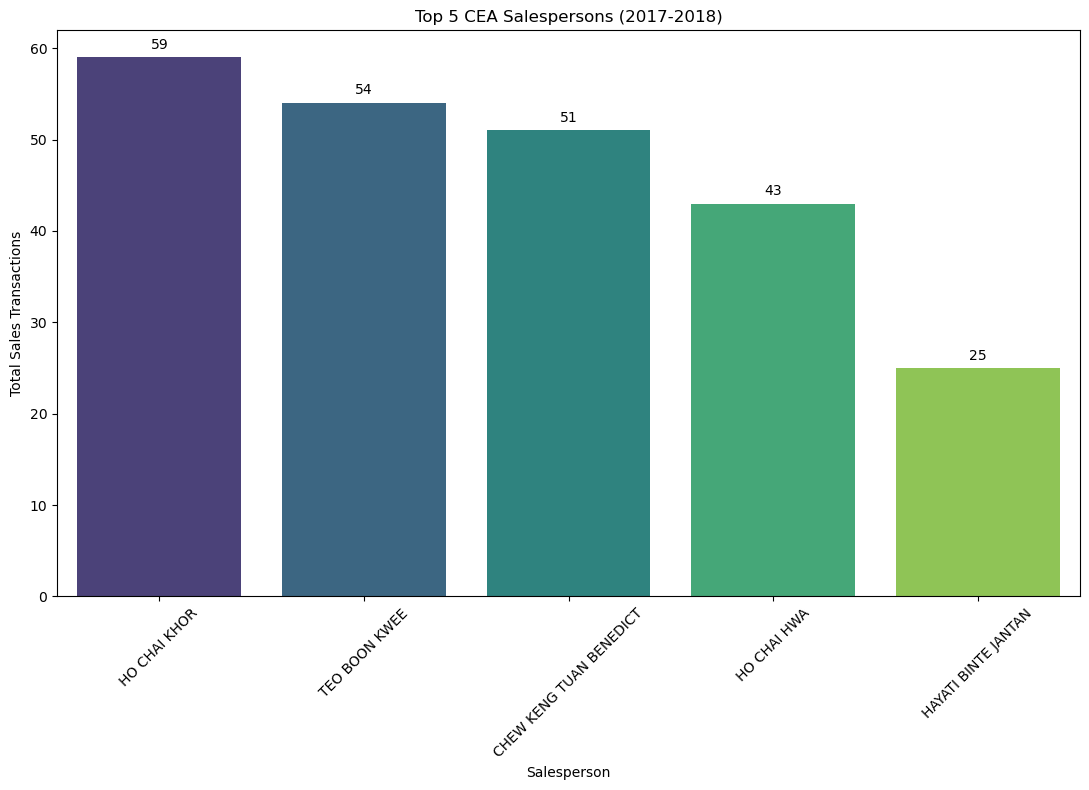

In [15]:
# Query data from mySQL DB and create Barchart using Seaborn library

user, pw, host, db = 'root', 'my-secret-pwd', '127.0.0.1', 'myCA2DB1'
cnx = mysql.connector.connect(user=user, password=pw, host=host, database=db)
cursor = cnx.cursor()

# Query MySQL DB to get the data
query = """
SELECT salesperson_name, transaction_date
FROM cea_salespersons
"""

# Execute the query
cursor.execute(query)
# Fetch the data
rows = cursor.fetchall()

# Convert to DataFrame
df1 = pd.DataFrame(rows, columns=['salesperson_name', 'transaction_date'])

# Close the cursor and connection
cursor.close()
cnx.close()

# Convert transaction_date to datetime
df1['transaction_date'] = pd.to_datetime(df1['transaction_date'])

# Group data by salesperson and calculate total sales count
sales_counts = df1.groupby('salesperson_name')['transaction_date'].count().reset_index()
sales_counts.rename(columns={'transaction_date': 'sales_count'}, inplace=True)

# Sort the sales_counts DataFrame in descending order
sales_counts.sort_values(by='sales_count', ascending=False, inplace=True)

# Get top 5 salespersons
top_salespersons = sales_counts.nlargest(5, 'sales_count')

# Create the bar chart
plt.figure(figsize=(11, 8))
ax = sns.barplot(data=top_salespersons, x='salesperson_name', y='sales_count', palette="viridis", width=0.8)

# Add labels on each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.title("Top 5 CEA Salespersons (2017-2018)")
plt.xlabel("Salesperson")
plt.ylabel("Total Sales Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
top_salespersons

,salesperson_name,sales_count
39,HO CHAI KHOR,59
183,TEO BOON KWEE,54
11,CHEW KENG TUAN BENEDICT,51
38,HO CHAI HWA,43
36,HAYATI BINTE JANTAN,25
